### The point of this notebook is to run edep-sim for multiple values for electron energy, then calculate the electron track length to compare to theory.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import subprocess
from theory_consts import *
from theory_fxns import *
%matplotlib notebook

#### This function create a geant4 macro with certain parameters including a constant energy (which is specified at the input), then runs edep-sim, converts to h5py, then returns the average track length. Note that the dumpTree.py used is slightly modified from the normal one you'd find in larnd-sim to allow for these tests.

In [5]:
def run(x):
    energy = str(x)
    energystr = "/gps/energy " + energy + " MeV\n"
    f = open("tracklengthTest.mac","w+")
    f.write('/edep/gdml/read /sdf/home/s/sfogarty/Desktop/LArTPC_sim/geometries/Module0_steplimit.gdml\n')
    f.write('/edep/db/open tracklength_test.root\n')
    f.write('/edep/hitLength TPCActive_shape 0.00001 mm\n')
    
    ### optional parameters
    #f.write('/run/setCut 50000 mm\n')
    #f.write('/process/eLoss/StepFunction 0.2 0.1  mm\n')
    #f.write('/process/eLoss/fluct false\n')
    #f.write('/run/setCut 1 km\n')
    #f.write('/edep/hitLength TPCActive_shape 0.00001 mm\n')
    
    f.write('/edep/update\n')
    #f.write('/process/inactivate msc\n')
    #f.write('/run/setCutForAGivenParticle gamma 50000 mm\n')
    f.write("/gps/pos/type Volume\n"+"/gps/pos/shape Para\n"+ "/gps/pos/centre 0.0 -22 0.0 cm\n"+ "/gps/pos/halfx 30.2723 cm\n"+ "/gps/pos/halfy 62.0543 cm\n"+"/gps/pos/halfz 31.0163 cm\n" +"/gps/ang/type iso\n")
    f.write("/gps/particle e-\n")
    f.write(energystr)
    f.close()
    
    bashCmd = ["edep-sim", "-e" ,"1000", "-p", "QGSP_BERT_LIV" ,"tracklengthTest.mac"]
    process = subprocess.Popen(bashCmd, stdout=subprocess.PIPE)
    output, error = process.communicate()
    
    bashCmd = ["rm", "-f","tracklength_test.h5"]
    process = subprocess.Popen(bashCmd, stdout=subprocess.PIPE)
    output, error = process.communicate()
    #print(output)
    #print("errors: ", error)
    #subprocess.Popen(["edep-sim", "-e" ,"5000", "-p", "QGSP_BERT_LIV" ,"hitlengthTest.mac"])
    
    %run dumpTree.py tracklength_test.root tracklength_test.h5
    print('Dump Tree Finished')
    f = h5py.File('tracklength_test.h5','r')
    
    tracklengths = []
    for eventID in np.unique(f['segments']['eventID']):
        tracklengths.append(np.sum(f['segments'][f['segments']['eventID'] == eventID]['dx']))
    avg_tracklength = np.mean(tracklengths)
    
    print("Average segments per event: ",len(f['segments'])/(np.max(f['segments']['eventID'])+1))
    f.close()
    #events=f['segments'][f['segments']['trackID'] == 0]
    #tracklengths = [np.sum([dx for j,dx in enumerate(events[events['eventID'] == i]['dx'])]) 
    #         for i in range(max(events['eventID'])+1)]
    #print('After finding track lengths')
    return avg_tracklength


#### Define some functions for theory calculations. These are a bit of a copy paste from theory.py.

In [11]:
from theory_fxns import *
from scipy import integrate

def FullRange(E):
    return 1/(dEdx_mean(E))

def L_theory(E_i):
    # calculates track length for a given energy from theory.
    # returns track length in mm
    
    E_end = 0.01 # MeV
    #l = 0.01 # cm
    #L = 0
    tracklength = abs(integrate.quad(FullRange, E_i, E_end)[0]) # cm
    #while E > 0:
    #    E = E - dEdx_mean(E)*l
    #    L+=l
    #return L
    return tracklength

#### Define NIST/CSDA values then run edep-sim for each energy

In [7]:
E_NIST = np.array([0.1,0.2,0.3,0.4,0.5,0.6])
CSDA_range = np.array([2.042E-02,6.309E-02,1.175E-01,1.787E-01,2.440E-01,3.119E-01])/1.397

# run edep-sim for every energy
energies = [0.1,0.2,0.3,0.4,0.5,0.6]
#energies = [0.565]
tracklengths = np.array([run(E) for E in energies])

100%|██████████| 1000/1000 [00:01<00:00, 720.34it/s]


Dump Tree Finished
Average segments per event:  15.442


100%|██████████| 1000/1000 [00:03<00:00, 253.32it/s]


Dump Tree Finished
Average segments per event:  46.031


100%|██████████| 1000/1000 [00:07<00:00, 141.92it/s]


Dump Tree Finished
Average segments per event:  85.022


100%|██████████| 1000/1000 [00:10<00:00, 94.27it/s]


Dump Tree Finished
Average segments per event:  129.773


100%|██████████| 1000/1000 [00:14<00:00, 70.27it/s]


Dump Tree Finished
Average segments per event:  175.74


100%|██████████| 1000/1000 [00:18<00:00, 54.51it/s]


Dump Tree Finished
Average segments per event:  222.349


Info in <TGeoManager::TGeoManager>: Geometry EDepSimGeometry, Simulated Detector Geometry created
Info in <TGeoManager::SetVisLevel>: Automatic visible depth disabled
Info in <TGeoManager::SetTopVolume>: Top volume is volWorld_PV. Master volume is volWorld_PV
Info in <TGeoNavigator::BuildCache>: --- Maximum geometry depth set to 100
Info in <TGeoManager::CheckGeometry>: Fixing runtime shapes...
Info in <TGeoManager::CheckGeometry>: ...Nothing to fix
Info in <TGeoManager::CloseGeometry>: Counting nodes...
Info in <TGeoManager::Voxelize>: Voxelizing...
Info in <TGeoManager::CloseGeometry>: Building cache...
Info in <TGeoManager::CountLevels>: max level = 17, max placements = 5001
Info in <TGeoNodeCache::BuildIDArray>: --- node ID tracking enabled, size=644228 Bytes

Info in <TGeoManager::CloseGeometry>: 80528 nodes/ 64 volume UID's in Simulated Detector Geometry
Info in <TGeoManager::CloseGeometry>: ----------------modeler ready----------------
Info in <TGeoNodeMatrix::CheckOverlaps>: Ch

#### Calculate tracklengths from theory for each energy

In [12]:
# get the track lengths from theory
tracklengths_theory = np.array([L_theory(E) for E in energies])

#### Make plot comparing track lengths for edep-sim vs Bethe-Bloch vs CSDA/NIST (the last two should match up)

<IPython.core.display.Javascript object>


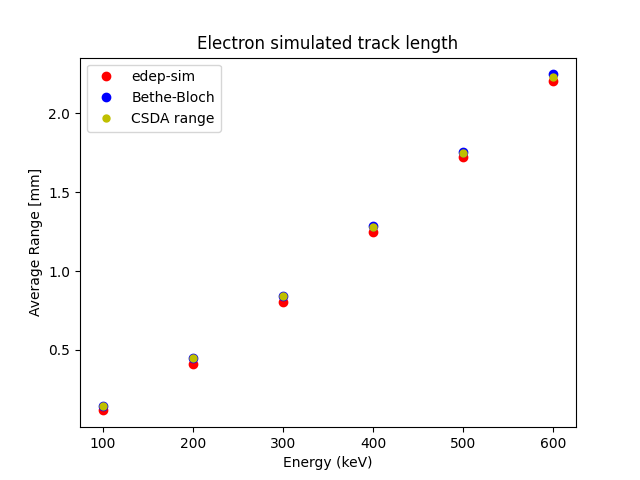

In [14]:
%matplotlib notebook
plt.plot(np.array(energies)*1000, tracklengths*10, 'ro', label='edep-sim')
plt.plot(np.array(energies)*1000, tracklengths_theory*10, 'bo', label='Bethe-Bloch')
plt.plot(E_NIST*1000, CSDA_range*10, 'yo', markersize = 5.0, label='CSDA range')
plt.xlabel('Energy (keV)')
plt.ylabel('Average Range [mm]')
plt.title('Electron simulated track length')
plt.legend()
#plt.savefig('tracklength_Argon39_edep0001.pdf')
plt.show()
#plt.savefig("tracklengths_upto1MeV_0p02_0pt0001mm_withsecondaries.pdf")
#plt.savefig("tracklengths_6pts_LargestSegments_withoutsecondaries.pdf")